# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
import sys
!{sys.executable} -m pip install citipy

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import datetime
from config import api_key 
from citipy import citipy
from scipy.stats import linregress

## Generate Cities List

In [5]:
cities = []

#use citipy to find nearest city for random latitudes and longitudes. Don't stop 'til you get enough.
while len(cities) < 600:
    lat = np.random.randint(-90,90)
    long = np.random.randint(-180,180) 
    city = citipy.nearest_city(lat,long)
    
    if city not in cities:
        cities.append(city)

print(len(cities))            

600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Create empty lists for API call data collection and subsequent dataframe
found_cities = []
city_latitude = []
city_longitude =[]
city_max_temp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date_of_call = []

base_url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("------------------------")
for i in range(len(cities)):
    search_city = cities[i].city_name.strip("()''")
    search_country = cities[i].country_code.strip("()''")
    url=str(base_url + "q=" + search_city + "," + search_country + "&units=metric&appid=" + api_key)
    try:
        json_response = requests.get(url).json()
        print(f"Processing Record {i} | City:" + str(json_response["name"]))
        found_cities.append(json_response["name"])
        city_latitude.append(json_response["coord"]["lat"])
        city_longitude.append(json_response["coord"]["lon"])
        city_max_temp.append(json_response["main"]["temp_max"])
        city_humidity.append(json_response["main"]["humidity"])
        city_cloudiness.append(json_response["clouds"]["all"])
        city_windspeed.append(json_response["wind"]["speed"])
        city_country.append(json_response["sys"]["country"])
        date_of_call.append(json_response["dt"])
    except KeyError:
        print("City Not Found. Skipping...")
    

Beginning Data Retrieval
------------------------
Processing Record 0 | City:Troitsko-Pechorsk
City Not Found. Skipping...
City Not Found. Skipping...
Processing Record 3 | City:Torbay
Processing Record 4 | City:Bluff
Processing Record 5 | City:Bograd
Processing Record 6 | City:Yulara
Processing Record 7 | City:Puerto Ayora
Processing Record 8 | City:Busselton
Processing Record 9 | City:Cusuna
Processing Record 10 | City:Los Llanos de Aridane
City Not Found. Skipping...
Processing Record 12 | City:Hilo
Processing Record 13 | City:Te Anau
Processing Record 14 | City:Geraldton
City Not Found. Skipping...
Processing Record 16 | City:Ostrovnoy
City Not Found. Skipping...
Processing Record 18 | City:Hobart
Processing Record 19 | City:Mahabalipuram
Processing Record 20 | City:Bredasdorp
Processing Record 21 | City:Ushuaia
Processing Record 22 | City:Faanui
Processing Record 23 | City:Atuona
Processing Record 24 | City:Shingū
Processing Record 25 | City:Luanda
Processing Record 26 | City:Cauc

Processing Record 223 | City:Sarkand
Processing Record 224 | City:Bonthe
Processing Record 225 | City:Yar-Sale
Processing Record 226 | City:Bariloche
Processing Record 227 | City:Fallon
Processing Record 228 | City:Lethem
Processing Record 229 | City:Lavrentiya
Processing Record 230 | City:Susurluk
Processing Record 231 | City:Tasiilaq
Processing Record 232 | City:Ola
Processing Record 233 | City:Bathsheba
Processing Record 234 | City:Kem'
Processing Record 235 | City:Akhmeta
Processing Record 236 | City:Akot
Processing Record 237 | City:Fort-Shevchenko
Processing Record 238 | City:Zhigansk
Processing Record 239 | City:Gibara
Processing Record 240 | City:Kadambūr
Processing Record 241 | City:Sitka
Processing Record 242 | City:Kosa
City Not Found. Skipping...
Processing Record 244 | City:Praia
Processing Record 245 | City:Salinópolis
Processing Record 246 | City:Nelson Bay
Processing Record 247 | City:Olafsvik
Processing Record 248 | City:Wanlaweyn
Processing Record 249 | City:Fairbanks

Processing Record 440 | City:Qasigiannguit
Processing Record 441 | City:Kampot
Processing Record 442 | City:Ratnagiri
Processing Record 443 | City:Swellendam
Processing Record 444 | City:Ferme-Neuve
Processing Record 445 | City:Vigrestad
Processing Record 446 | City:Río Gallegos
Processing Record 447 | City:Payson
Processing Record 448 | City:Tuy Hoa
Processing Record 449 | City:Wāshīm
Processing Record 450 | City:Kaeo
Processing Record 451 | City:Rio Grande
Processing Record 452 | City:Kota Kinabalu
Processing Record 453 | City:Dunoon
Processing Record 454 | City:Isangel
Processing Record 455 | City:Olinda
Processing Record 456 | City:Camacha
Processing Record 457 | City:Boa Vista
Processing Record 458 | City:Imbituba
Processing Record 459 | City:Talakan
City Not Found. Skipping...
Processing Record 461 | City:Taixing
Processing Record 462 | City:Aykhal
Processing Record 463 | City:Nalvo
Processing Record 464 | City:Egvekinot
Processing Record 465 | City:Chokurdakh
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df = pd.DataFrame({
    "City":found_cities,
    "Lat":city_latitude,
    "Long":city_longitude,
    "Max Temp (C)":city_max_temp,
    "Humidity":city_humidity,
    "Cloudiness":city_cloudiness,
    "Windspeed":city_windspeed,
    "Country Code":city_country,
    "Date":date_of_call 
})

cities_df.to_csv("city_data_27-9",index=False)

cities_df

,City,Lat,Long,Max Temp (C),Humidity,Cloudiness,Windspeed,Country Code,Date
0,Troitsko-Pechorsk,62.71,56.20,7.13,88,100,0.90,RU,1601306288
1,Torbay,47.67,-52.73,18.89,93,90,8.20,CA,1601306289
2,Bluff,-46.60,168.33,3.33,76,96,8.94,NZ,1601306289
3,Bograd,54.23,90.83,4.00,93,90,2.25,RU,1601306289
4,Yulara,-25.24,130.99,21.00,77,90,3.60,AU,1601306289
...,...,...,...,...,...,...,...,...,...
534,Sorong,-0.88,131.25,26.36,80,71,2.11,ID,1601306430
535,College,64.86,-147.80,3.00,90,40,3.60,US,1601306430
536,Baker City,44.77,-117.83,9.44,80,1,0.33,US,1601306203
537,Nantucket,41.28,-70.10,22.00,94,75,6.70,US,1601306431


In [8]:
cities_df.describe()

,Lat,Long,Max Temp (C),Humidity,Cloudiness,Windspeed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,18.994824,17.642375,19.044527,70.343228,52.560297,3.634249,1.601306e+09
std,33.314956,91.654175,10.025019,20.885397,38.439273,2.293817,7.430372e+01
min,-54.800000,-179.170000,-10.250000,8.000000,0.000000,0.130000,1.601306e+09
25%,-8.055000,-64.730000,11.165000,61.000000,10.000000,1.955000,1.601306e+09
50%,22.050000,23.530000,21.000000,76.000000,64.000000,3.100000,1.601306e+09
75%,47.300000,100.300000,27.000000,86.000000,90.000000,4.805000,1.601306e+09
max,77.480000,179.320000,42.200000,100.000000,100.000000,15.650000,1.601306e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humid_cities = cities_df.loc[cities_df["Humidity"]>100]
humid_cities

,City,Lat,Long,Max Temp (C),Humidity,Cloudiness,Windspeed,Country Code,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

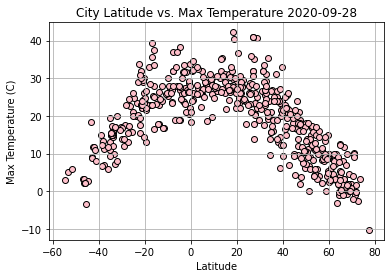

In [12]:
#Convert date timestamp to easy-read date for charting
date_timestamp = cities_df.iloc[1,8]
date = datetime.datetime.fromtimestamp(date_timestamp).strftime('%Y-%m-%d')


lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Max Temp (C)"]
plt.scatter(lat,max_temp,c="pink",edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(axis="both")
plt.savefig("lat_v_temp.png")
plt.show()

## Latitude vs. Humidity Plot

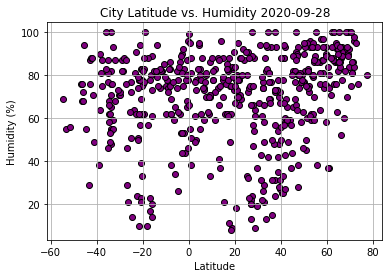

In [13]:
lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Humidity"]
plt.scatter(lat,max_temp,c="purple",edgecolors="black")
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(axis="both")
plt.savefig("lat_v_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

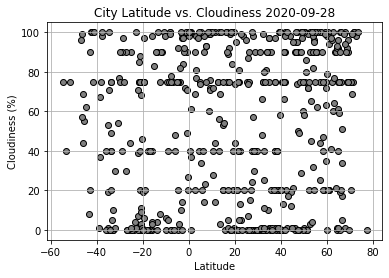

In [14]:
lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Cloudiness"]
plt.scatter(lat,max_temp,c="gray",edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(axis="both")
plt.savefig("lat_v_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

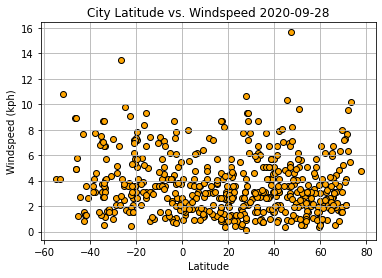

In [15]:
lat = cities_df.loc[:,"Lat"]
max_temp = cities_df.loc[:,"Windspeed"]
plt.scatter(lat,max_temp,c="orange",edgecolors="black")
plt.title(f"City Latitude vs. Windspeed {date}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (kph)")
plt.grid(axis="both")
plt.savefig("lat_v_windspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8473840194199225


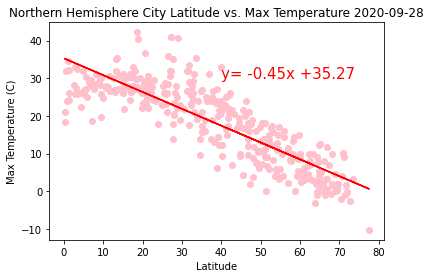

In [27]:
lat = cities_df.loc[cities_df["Lat"]>0,"Lat"]
max_temp = cities_df.loc[cities_df["Lat"]>0,"Max Temp (C)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,max_temp)
northern_temp_regress_values = slope*lat + intercept
northern_temp_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,max_temp,c="pink",)
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig("lat_v_temp_regression_northern.png")
plt.plot(lat,northern_temp_regress_values,"r-")
plt.annotate(northern_temp_regress_eq,(40,30),fontsize=15,color="red")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7927512371819715


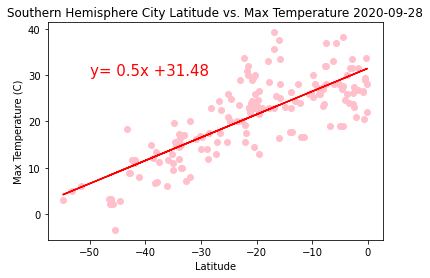

In [29]:
lat = cities_df.loc[cities_df["Lat"]<0,"Lat"]
max_temp = cities_df.loc[cities_df["Lat"]<0,"Max Temp (C)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,max_temp)
southern_temp_regress_values = slope*lat + intercept
southern_temp_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,max_temp,c="pink",)
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig("lat_v_temp_regression_southern.png")
plt.plot(lat,southern_temp_regress_values,"r-")
plt.annotate(southern_temp_regress_eq,(-50,30),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.24946463848850525


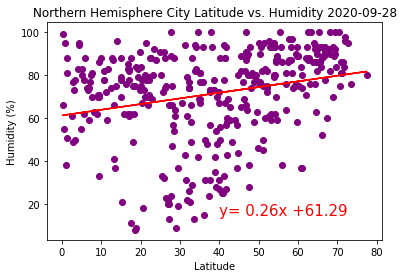

In [33]:
lat = cities_df.loc[cities_df["Lat"]>0,"Lat"]
humidity = cities_df.loc[cities_df["Lat"]>0,"Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,humidity)
northern_humidity_regress_values = slope*lat + intercept
northern_humidity_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,humidity,c="purple",)
plt.title(f"Northern Hemisphere City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("lat_v_humidity_regression_northern.png")
plt.plot(lat,northern_humidity_regress_values,"r-")
plt.annotate(northern_humidity_regress_eq,(40,15),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.01861679244141934


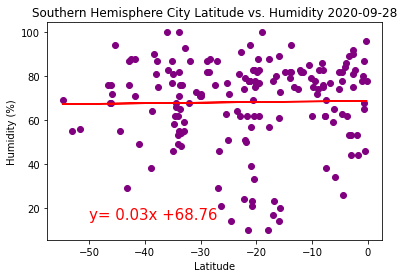

In [35]:
lat = cities_df.loc[cities_df["Lat"]<0,"Lat"]
humidity = cities_df.loc[cities_df["Lat"]<0,"Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,humidity)
southern_humidity_regress_values = slope*lat + intercept
southern_humidity_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,humidity,c="purple",)
plt.title(f"Southern Hemisphere City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("lat_v_humidity_regression_southern.png")
plt.plot(lat,southern_humidity_regress_values,"r-")
plt.annotate(southern_humidity_regress_eq,(-50,15),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.07062620473999932


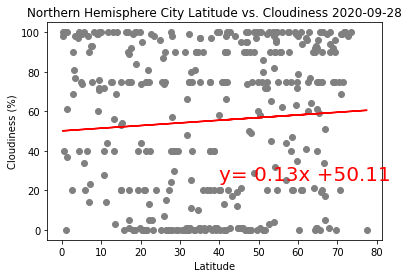

In [39]:
lat = cities_df.loc[cities_df["Lat"]>0,"Lat"]
cloudiness = cities_df.loc[cities_df["Lat"]>0,"Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,cloudiness)
northern_cloudiness_regress_values = slope*lat + intercept
northern_cloudiness_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,cloudiness,c="gray")
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("lat_v_cloudiness_regression_northern.png")
plt.plot(lat,northern_cloudiness_regress_values,"r-")
plt.annotate(northern_cloudiness_regress_eq,(40,25),fontsize=20,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.09104441159176913


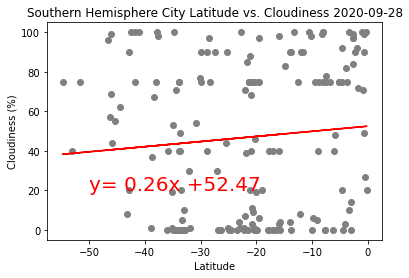

In [41]:
lat = cities_df.loc[cities_df["Lat"]<0,"Lat"]
cloudiness = cities_df.loc[cities_df["Lat"]<0,"Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,cloudiness)
southern_cloudiness_regress_values = slope*lat + intercept
southern_cloudiness_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,cloudiness,c="gray")
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("lat_v_cloudiness_regression_southern.png")
plt.plot(lat,southern_cloudiness_regress_values,"r-")
plt.annotate(southern_cloudiness_regress_eq,(-50,20),fontsize=20,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.06465292267818114


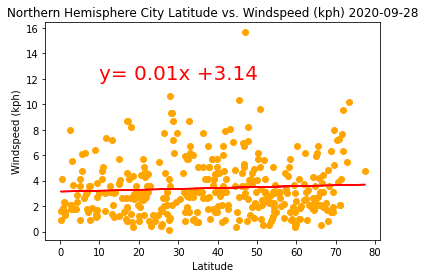

In [43]:
lat = cities_df.loc[cities_df["Lat"]>0,"Lat"]
windspeed = cities_df.loc[cities_df["Lat"]>0,"Windspeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,windspeed)
northern_windspeed_regress_values = slope*lat + intercept
northern_windspeed_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,windspeed,c="orange")
plt.title(f"Northern Hemisphere City Latitude vs. Windspeed (kph) {date}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (kph)")
plt.savefig("lat_v_windspeed_regression_northern.png")
plt.plot(lat,northern_windspeed_regress_values,"r-")
plt.annotate(northern_windspeed_regress_eq,(10,12),fontsize=20,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.1175849027697687


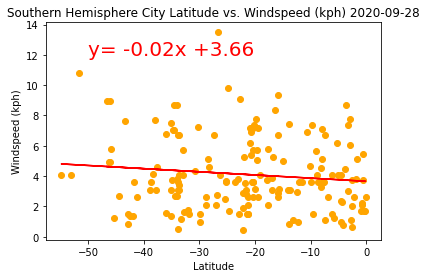

In [45]:
lat = cities_df.loc[cities_df["Lat"]<0,"Lat"]
windspeed = cities_df.loc[cities_df["Lat"]<0,"Windspeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat,windspeed)
southern_windspeed_regress_values = slope*lat + intercept
southern_windspeed_regress_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
                
print(f"The r-value is {rvalue}")
plt.scatter(lat,windspeed,c="orange")
plt.title(f"Southern Hemisphere City Latitude vs. Windspeed (kph) {date}")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (kph)")
plt.savefig("lat_v_windspeed_regression_southern.png")
plt.plot(lat,southern_windspeed_regress_values,"r-")
plt.annotate(southern_windspeed_regress_eq,(-50,12),fontsize=20,color="red")
plt.show()